  Exemplo Alternativo  Bar Sex/Sab fome Cliente Preço Chuva  Res       Tipo  \
0      X1         Sim  Não     Não  Sim  Alguns   RRR   Não  Sim    Francês   
1      x2         Sim  Não     Não  Sim   Cheio     R   Não  Não  Tailandês   
2      x3         Não  Sim     Não  Não  Alguns     R   Não  Não  Hamburger   
3      x4         Sim  Não     Sim  Sim   Cheio     R   Sim  Não  Tailandês   
4      X5         Sim  Não     Sim  Não   Cheio   RRR   Não  Sim    Francês   

    Tempo conc  
0    0-10  Sim  
1   30-60  Não  
2    0-10  Sim  
3  out/30  Sim  
4     >60  Não  


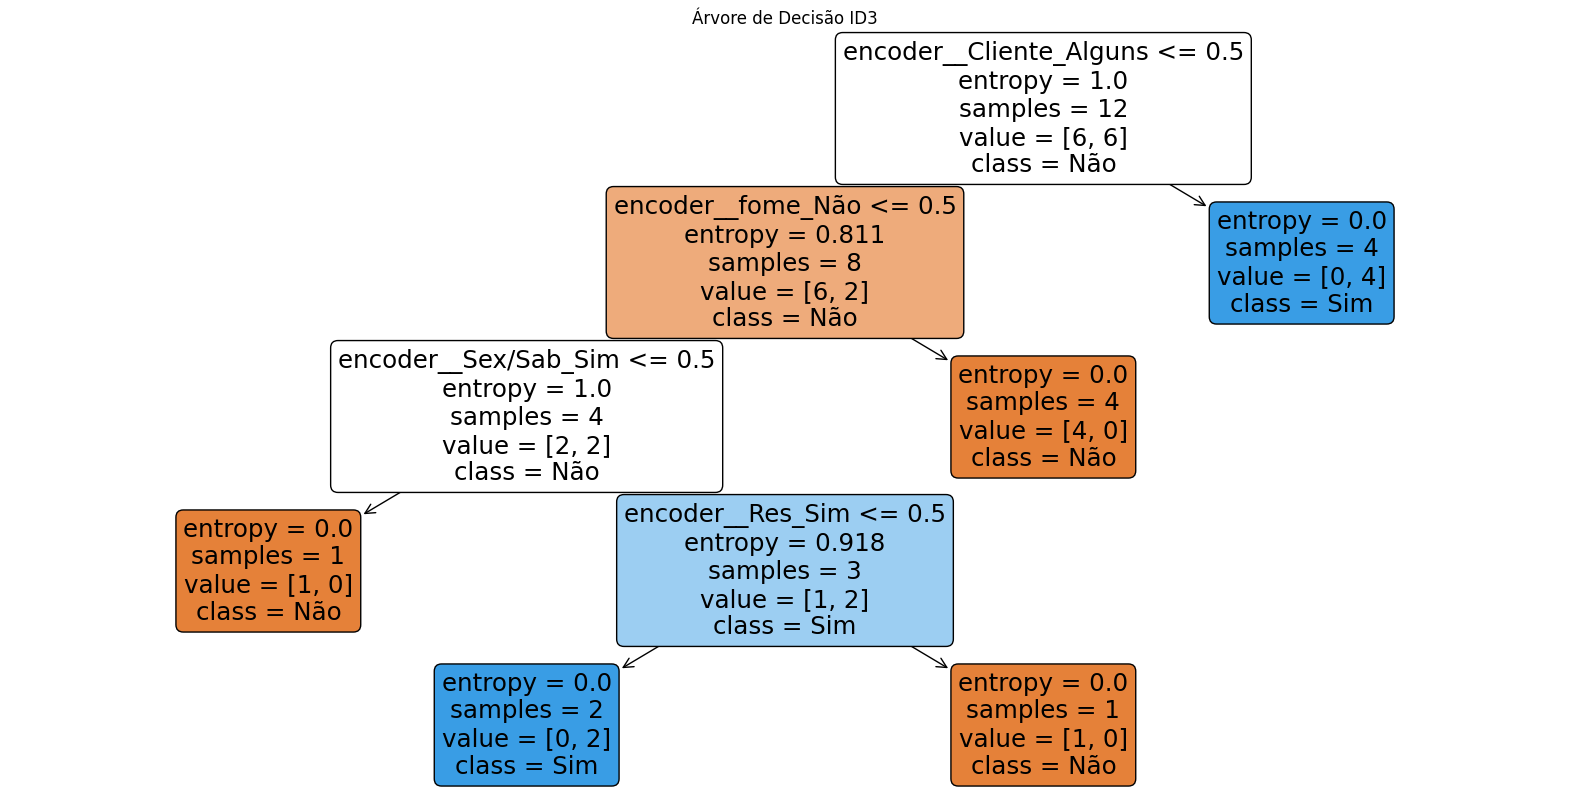

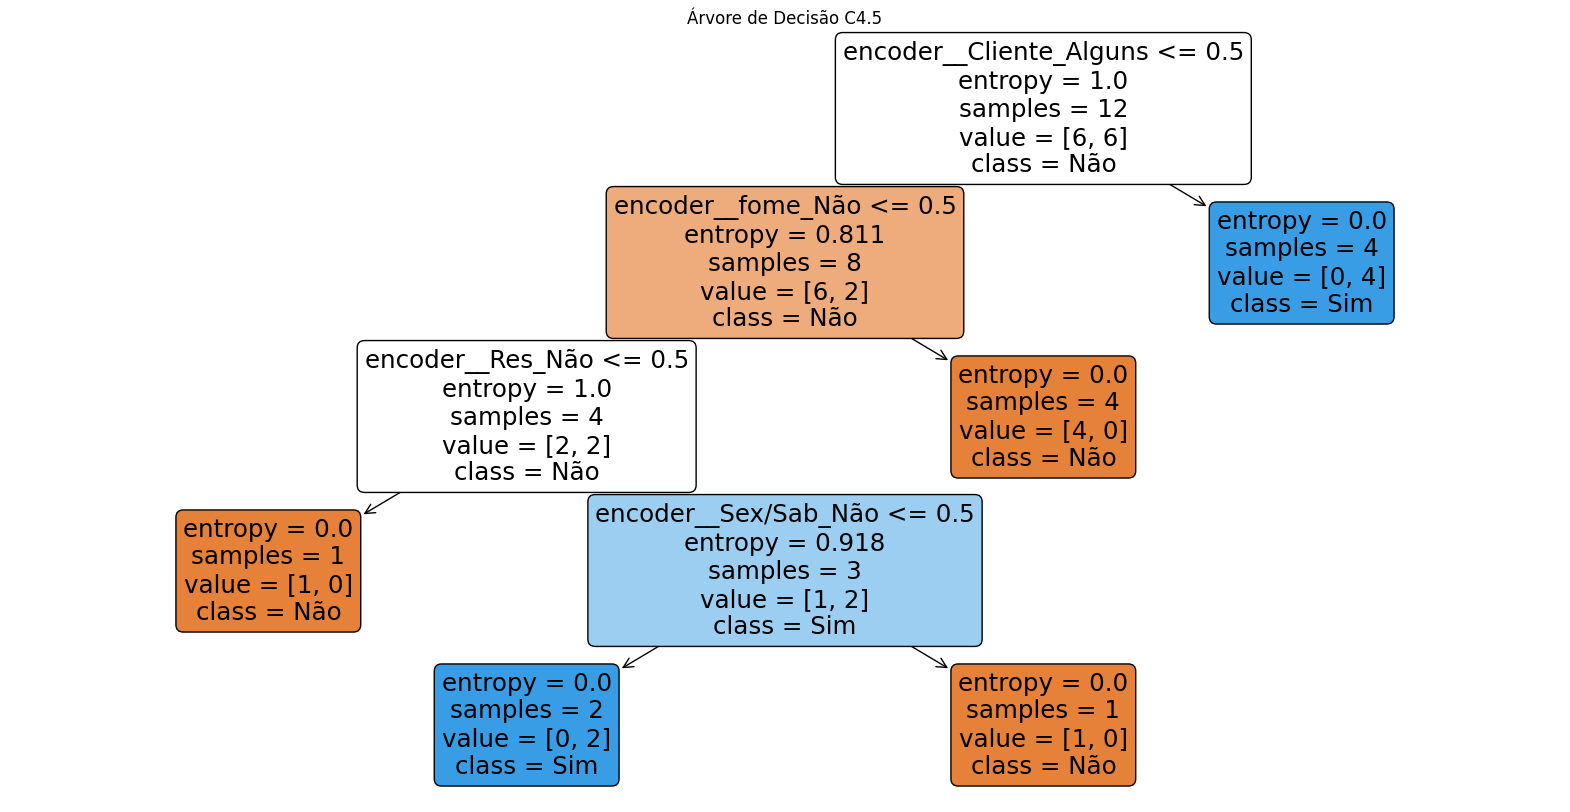

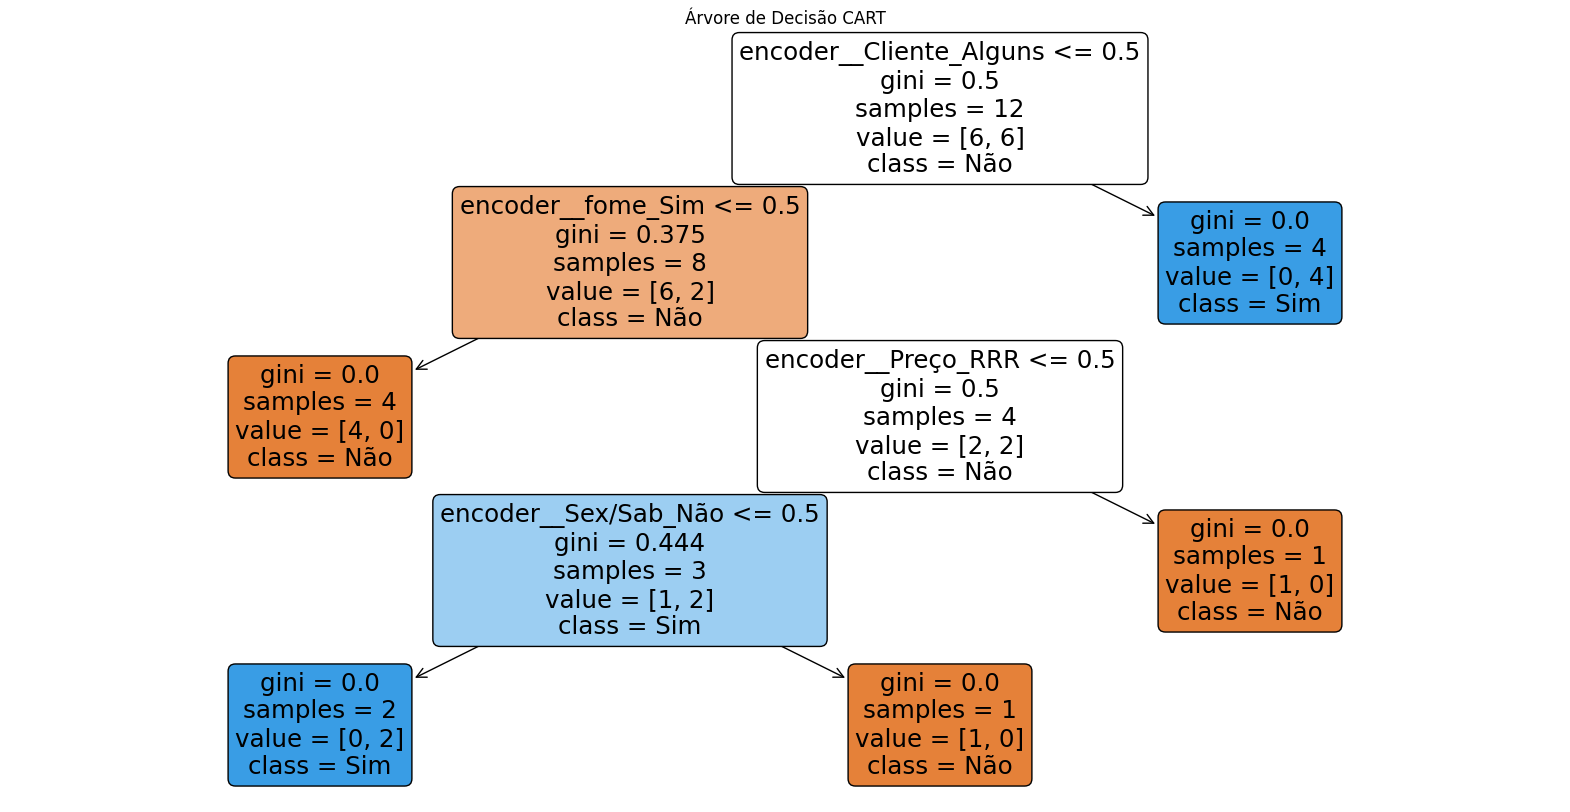

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import tree
import matplotlib.pyplot as plt

# Carregando dados do arquivo CSV
file_path = r'C:\Users\larin\Desktop\PUC\IA\Bases de dados\Lista 02\restaurantev2.csv'
df = pd.read_csv(file_path, encoding='latin1', delimiter=';')

# Ajustando o código para usar os nomes reais das colunas
X = df.drop(['Exemplo', 'conc'], axis=1)

# Selecionando o alvo
y = df['conc']

# Aplicando One-Hot Encoding para variáveis categóricas
categorical_features = ['Alternativo', 'Bar', 'Sex/Sab', 'fome', 'Cliente', 'Preço', 'Chuva', 'Res', 'Tipo', 'Tempo']
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

X_encoded = column_transformer.fit_transform(X)

# Criando modelos de árvore de decisão
id3_tree = DecisionTreeClassifier(criterion='entropy') # Entropia
c45_tree = DecisionTreeClassifier(criterion='entropy') # Entropia
cart_tree = DecisionTreeClassifier(criterion='gini') # Índice de Gini

# Treinando os modelos
id3_tree.fit(X_encoded, y)
c45_tree.fit(X_encoded, y)
cart_tree.fit(X_encoded, y)

# Visualizando árvore de decisão ID3
plt.figure(figsize=(20, 10))
tree.plot_tree(id3_tree, feature_names=column_transformer.get_feature_names_out(), class_names=id3_tree.classes_, filled=True, rounded=True)
plt.title("Árvore de Decisão ID3")
plt.show()

# Visualizando árvore de decisão C4.5
plt.figure(figsize=(20, 10))
tree.plot_tree(c45_tree, feature_names=column_transformer.get_feature_names_out(), class_names=c45_tree.classes_, filled=True, rounded=True)
plt.title("Árvore de Decisão C4.5")
plt.show()

# Visualizando árvore de decisão CART
plt.figure(figsize=(20, 10))
tree.plot_tree(cart_tree, feature_names=column_transformer.get_feature_names_out(), class_names=cart_tree.classes_, filled=True, rounded=True)
plt.title("Árvore de Decisão CART")
plt.show()
